In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score
from sklearn.pipeline import Pipeline

# Viewing The Data

In [2]:
df=pd.read_csv("first inten project.csv")
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled


# showing the types of variables

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

# showing the statistical measures of the attributes

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
number of adults,36285.0,1.844839,0.518813,0.0,2.0,2.00,2.0,4.0
number of children,36285.0,0.105360,0.402704,0.0,0.0,0.00,0.0,10.0
number of weekend nights,36285.0,0.810693,0.870590,0.0,0.0,1.00,2.0,7.0
number of week nights,36285.0,2.204602,1.410946,0.0,1.0,2.00,3.0,17.0
car parking space,36285.0,0.030977,0.173258,0.0,0.0,0.00,0.0,1.0
lead time,36285.0,85.239851,85.938796,0.0,17.0,57.00,126.0,443.0
repeated,36285.0,0.025630,0.158032,0.0,0.0,0.00,0.0,1.0
P-C,36285.0,0.023343,0.368281,0.0,0.0,0.00,0.0,13.0
P-not-C,36285.0,0.153369,1.753931,0.0,0.0,0.00,0.0,58.0
average price,36285.0,103.421636,35.086469,0.0,80.3,99.45,120.0,540.0


# Checking for null values

In [5]:
df.isnull().sum()

Booking_ID                  0
number of adults            0
number of children          0
number of weekend nights    0
number of week nights       0
type of meal                0
car parking space           0
room type                   0
lead time                   0
market segment type         0
repeated                    0
P-C                         0
P-not-C                     0
average price               0
special requests            0
date of reservation         0
booking status              0
dtype: int64

# Check if there are any white spaces or incorrect form in the columns


In [6]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if df[column].str.contains(r'^\s|\s$').any():
        print(f"Column '{column}' contains leading or trailing white spaces.")
    else:
        print(f"No white spaces in column '{column}'.")


No white spaces in column 'Booking_ID'.
No white spaces in column 'type of meal'.
No white spaces in column 'room type'.
No white spaces in column 'market segment type'.
No white spaces in column 'date of reservation'.
No white spaces in column 'booking status'.


# Drop unnecessary columns


In [7]:
df = df.drop(columns=['P-C','P-not-C'])
df.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,77.00,0,4/11/2018,Canceled


# Visualizations

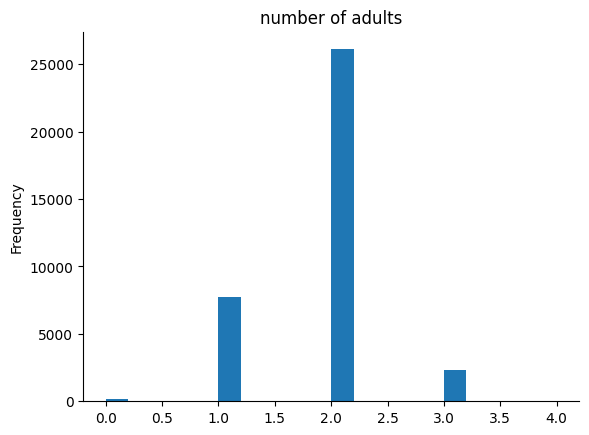

In [8]:
df['number of adults'].plot(kind='hist', bins=20, title='number of adults')
plt.gca().spines[['top', 'right',]].set_visible(False)

C:\Users\toka\AppData\Local\Temp\ipykernel_15072\1574791131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')
C:\Users\toka\AppData\Local\Temp\ipykernel_15072\1574791131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')
C:\Users\toka\AppData\Local\Temp\ipykernel_15072\1574791131.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[col], palette='viridis')
C:\Users\toka\AppData\Local\Temp\ipykernel_15072\1574791131.py:6: FutureWarning: 

Passing `palette` without assigning `h

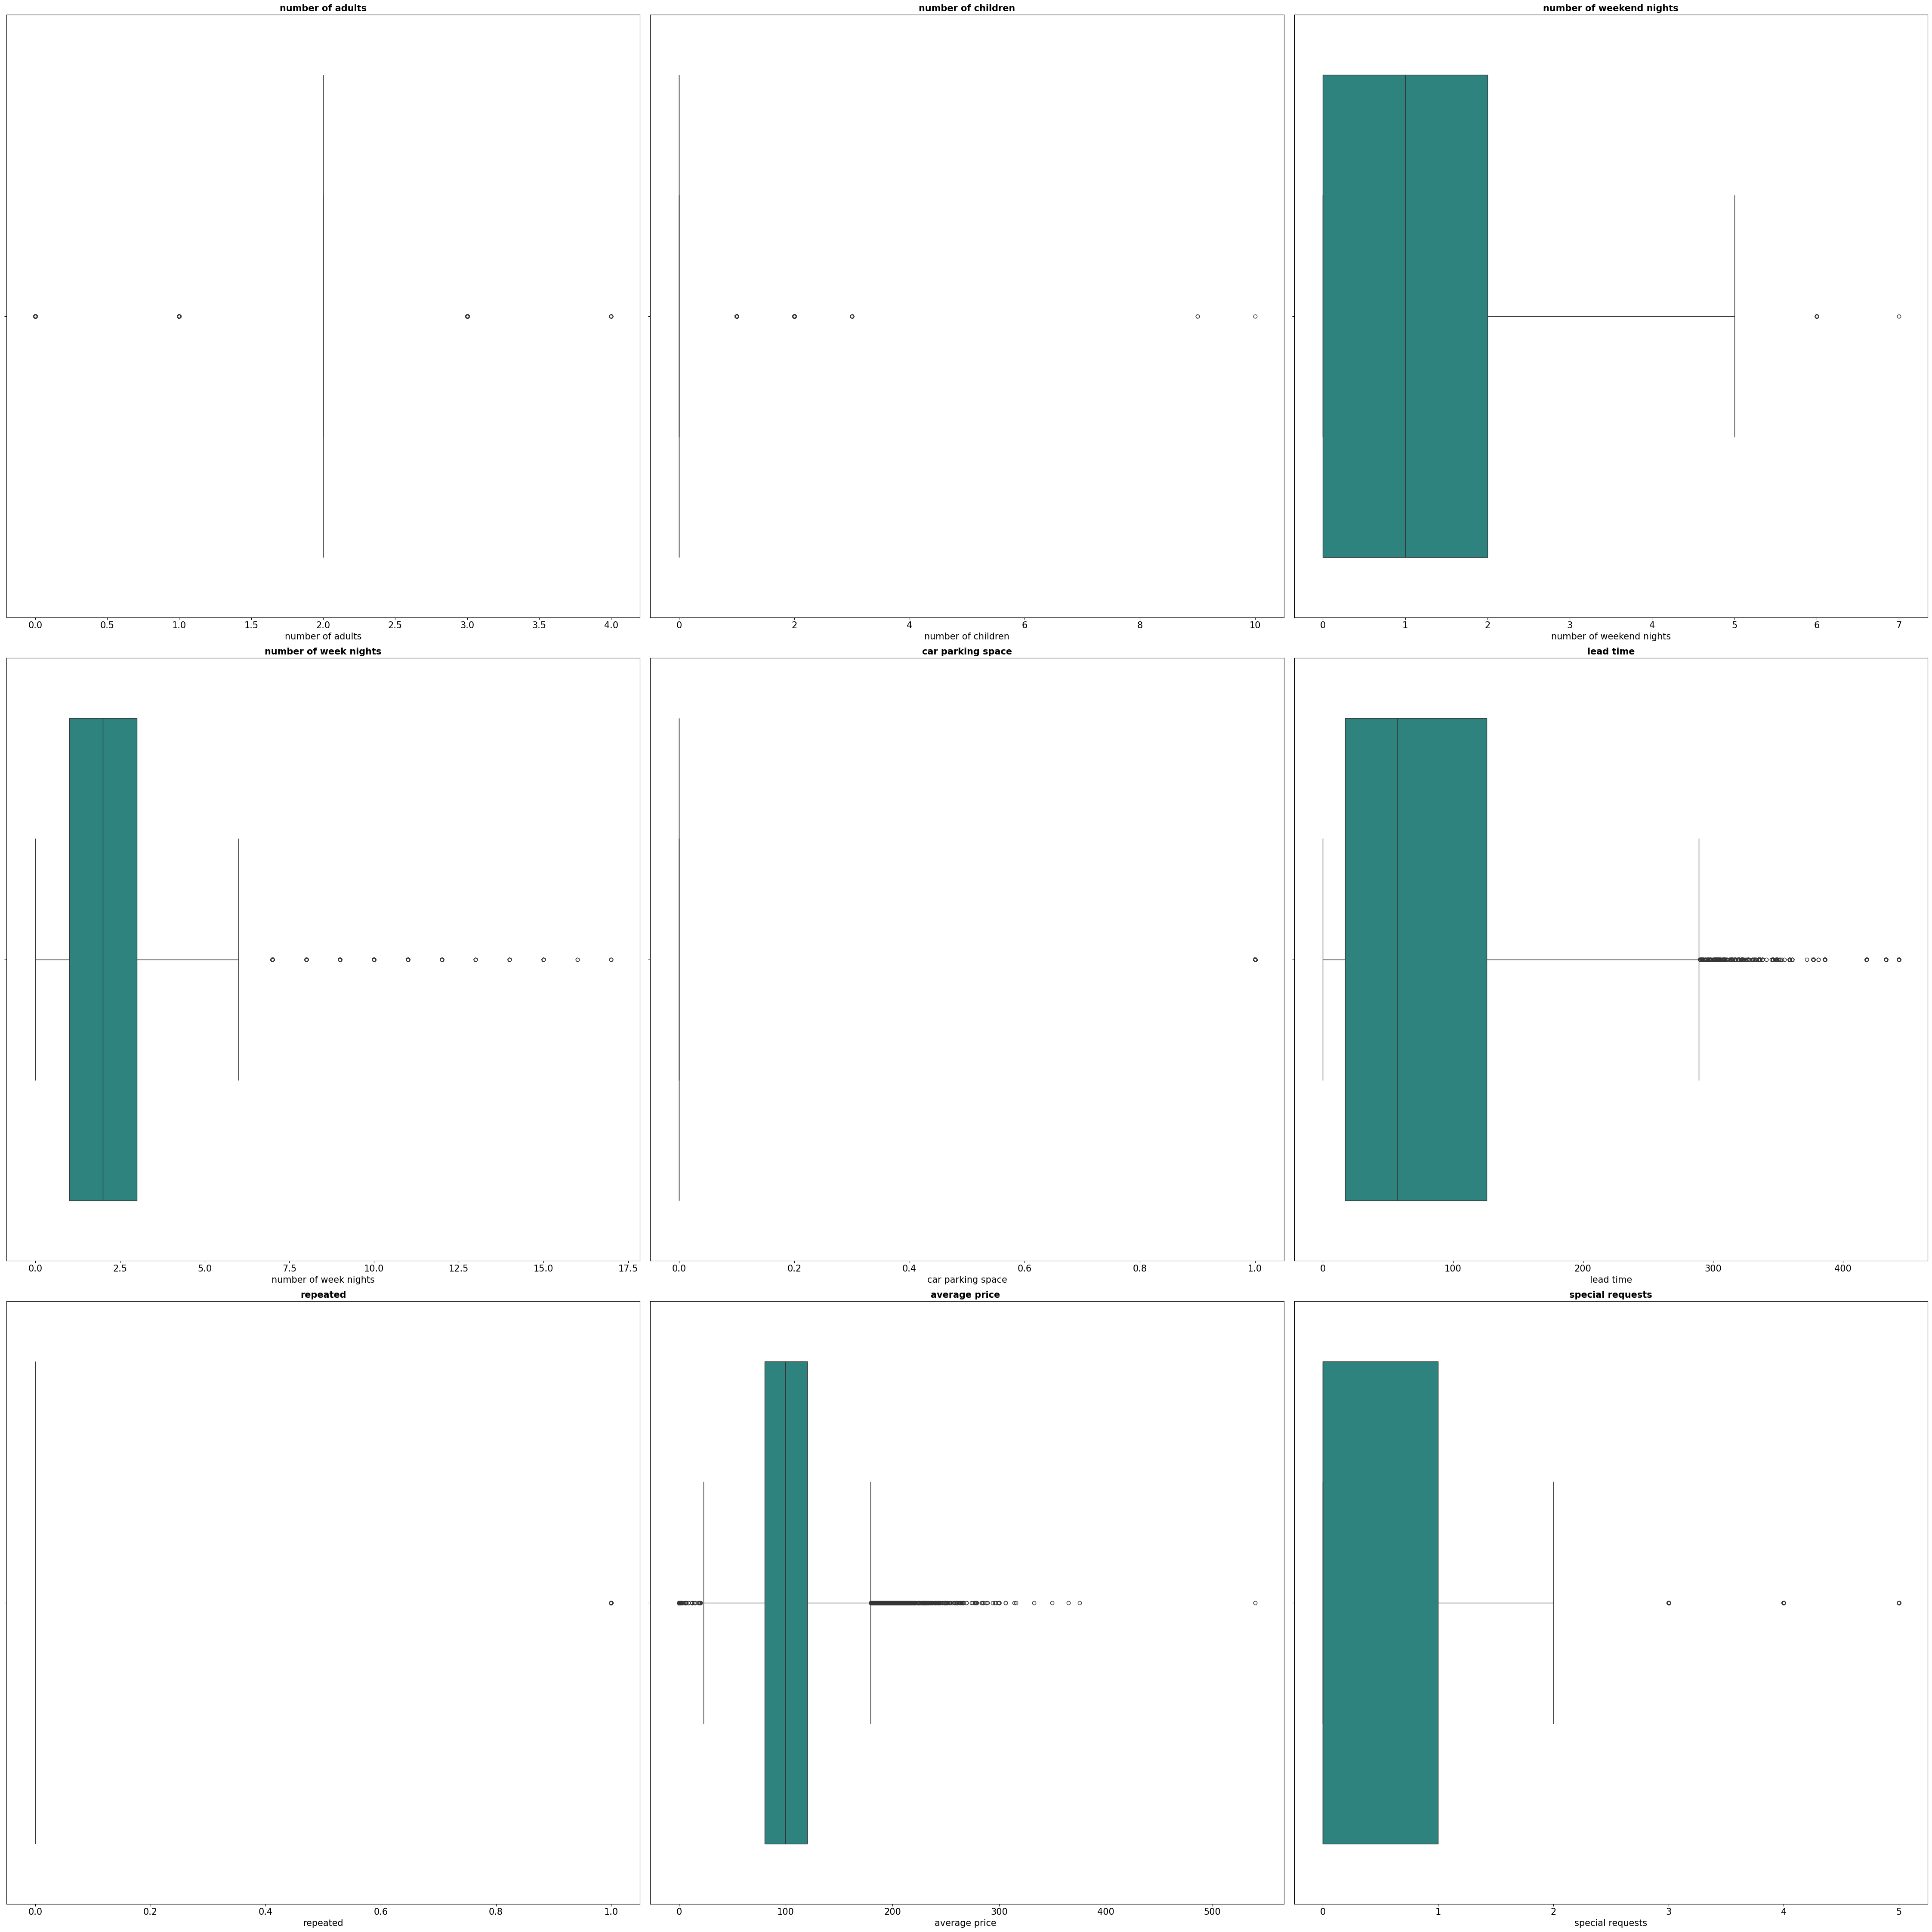

In [16]:
plt.figure(figsize=(45,45))
plt.subplot(3,3,1)
numerical_col = df.select_dtypes(include = ['int64','float64']).columns
for i, col in enumerate(numerical_col, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], palette='viridis')
    plt.xlabel(col, fontsize=15)
    plt.title(col, fontsize=15, fontweight='bold')
    plt.xticks(fontsize=15)

plt.tight_layout()
plt.show()

In [9]:
df['booking status']=df['booking status'].astype('category').cat.codes

In [10]:
df['booking status']

0        1
1        1
2        0
3        0
4        0
        ..
36280    0
36281    1
36282    1
36283    1
36284    1
Name: booking status, Length: 36285, dtype: int8

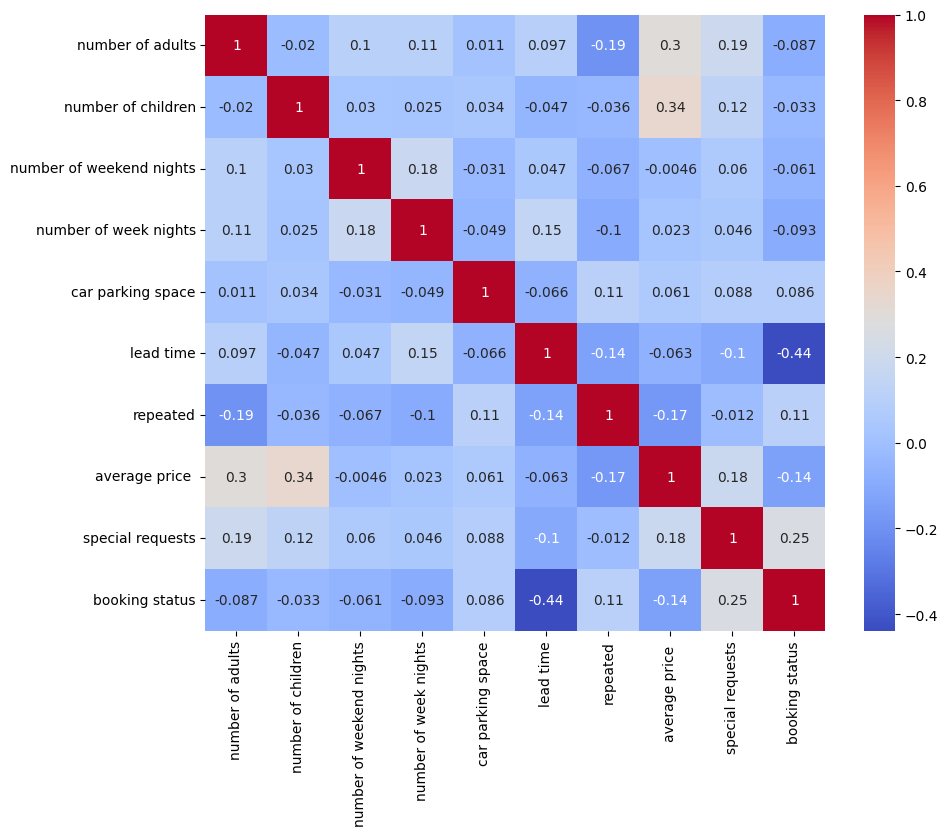

In [11]:
plt.figure(figsize=(10,8))
numerical_col = df.select_dtypes(include = ['number']).columns
sns.heatmap(df[numerical_col].corr(), annot=True, cmap='coolwarm')
plt.show()

# Defining Outliers

In [12]:
def outlier(df):

  Q1=df.quantile(0.25)

  Q3=df.quantile(0.75)

  IQR=Q3-Q1

  out = df[((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

  return out

for col in numerical_col:
    outliers=outlier(df[col])
    print("Number of outliers in",col,":", str(len(outliers)),",It's Percentage is : ",str(len(outliers)*100/len(df)),"%")
    print("\n")

Number of outliers in number of adults : 10175 ,It's Percentage is :  28.041890588397408 %


Number of outliers in number of children : 2702 ,It's Percentage is :  7.446603279592118 %


Number of outliers in number of weekend nights : 21 ,It's Percentage is :  0.05787515502273667 %


Number of outliers in number of week nights : 324 ,It's Percentage is :  0.8929309632079372 %


Number of outliers in car parking space : 1124 ,It's Percentage is :  3.0976987735979056 %


Number of outliers in lead time : 1332 ,It's Percentage is :  3.670938404299297 %


Number of outliers in repeated : 930 ,It's Percentage is :  2.563042579578338 %


Number of outliers in average price  : 1696 ,It's Percentage is :  4.674107758026733 %


Number of outliers in special requests : 762 ,It's Percentage is :  2.1000413393964448 %


Number of outliers in booking status : 0 ,It's Percentage is :  0.0 %




# Encoding

In [13]:
df1 = df.copy()
df1=df1.drop(columns=['booking status'])
# Apply Label Encoding to the remaining categorical columns
label_encoders = {}
categorical_columns = df1.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df1[column])
    label_encoders[column] = le

# Check the resulting DataFrame
df1.head()

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,average price,special requests,date of reservation
0,0,1,1,2,5,0,0,0,224,3,0,88.00,0,53
1,1,1,0,1,3,3,0,0,5,4,0,106.68,1,147
2,2,2,1,1,3,0,0,0,1,4,0,50.00,0,236
3,3,1,0,0,2,0,0,0,211,4,0,100.00,1,318
4,4,1,0,1,2,3,0,0,48,4,0,77.00,0,278


# Feature Selection

In [14]:
#Feature Selection
X = df1.drop(columns=['Booking_ID'])  # Drop target column
y = df['booking status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelling

In [15]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2)),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Accuracy: 78.69740951681058
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      3594
           1       0.82      0.88      0.85      7292

    accuracy                           0.79     10886
   macro avg       0.76      0.74      0.75     10886
weighted avg       0.78      0.79      0.78     10886



In [16]:
#Recursive Feature Elimination (RFE)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rfe_selector = RFE(estimator=rf_classifier, n_features_to_select=2)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)

# Feature Importance from Tree-based Models
rf_classifier.fit(X_train, y_train)
feature_importance = rf_classifier.feature_importances_


print("Top features (RFE):", X.columns[rfe_selector.get_support()])
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Top features (RFE): Index(['lead time', 'average price '], dtype='object')
Accuracy: 78.69740951681058
              precision    recall  f1-score   support

           0       0.71      0.60      0.65      3594
           1       0.82      0.88      0.85      7292

    accuracy                           0.79     10886
   macro avg       0.76      0.74      0.75     10886
weighted avg       0.78      0.79      0.78     10886



In [29]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)

# Feature Importance from Decision Tree
feature_importance = dt_classifier.feature_importances_

print("Top features (Decision Tree):", X.columns[np.argsort(feature_importance)[-5:]])
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))

Top features (Decision Tree): Index(['special requests', 'market segment type', 'date of reservation',
       'average price ', 'lead time'],
      dtype='object')
Accuracy: 86.53316185926879
              precision    recall  f1-score   support

           0       0.79      0.80      0.80      3594
           1       0.90      0.90      0.90      7292

    accuracy                           0.87     10886
   macro avg       0.85      0.85      0.85     10886
weighted avg       0.87      0.87      0.87     10886



# Hyperparameter Tuning

In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.linear_model import LogisticRegression
import joblib
import pickle

In [32]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(f_classif, k=10)),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [33]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5],
    'classifier__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


# Evaluate the best model


In [35]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)
print(classification_report_output)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      3594
           1       0.91      0.94      0.93      7292

    accuracy                           0.90     10886
   macro avg       0.89      0.87      0.88     10886
weighted avg       0.90      0.90      0.90     10886



# Feature selection using SelectKBest


In [37]:
selector = SelectKBest(f_classif, k=10)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)


# Train model with selected features


In [39]:
best_model.fit(X_train_kbest, y_train)
y_pred_kbest = best_model.predict(X_test_kbest)
accuracy_kbest = accuracy_score(y_test, y_pred_kbest)
classification_report_kbest = classification_report(y_test, y_pred_kbest)
print(classification_report_kbest)

              precision    recall  f1-score   support

           0       0.88      0.81      0.84      3594
           1       0.91      0.94      0.93      7292

    accuracy                           0.90     10886
   macro avg       0.89      0.87      0.88     10886
weighted avg       0.90      0.90      0.90     10886



# Save the model using joblib


In [41]:
import joblib

# Assuming `best_model` is your trained model
joblib.dump(best_model, 'model.joblib')


['model.joblib']